**Step 1:**
**Importing the necessary Modules**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Importing the dataset:**

In [ ]:
dataset = pd.read_csv('dataset.csv')

**Performing data preprocessing:**

In [ ]:
#generalizing the column names
dataset.columns = dataset.columns.str.strip().str.replace(' ','_').str.lower()

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#extracting the date column and adding a separate column for year and month

### Gathering insights  
**We can gather insights from this data by visualizing the data**

**Line Plot:**

<Axes: xlabel='day', ylabel='rapid_route'>

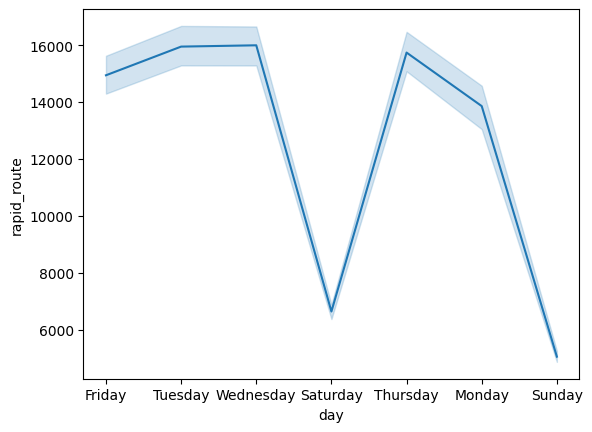

In [44]:
sns.lineplot(x='day',y='rapid_route',data=dataset)

**From this plot, you can see that almost all routes are used the most on weekdays, especially on Wed and Thu, while being used significantly less on weekends, even less on Sundays, indicating people rarely have the need to commute to places on Sundays**

### Insight no. 2:

<Axes: >

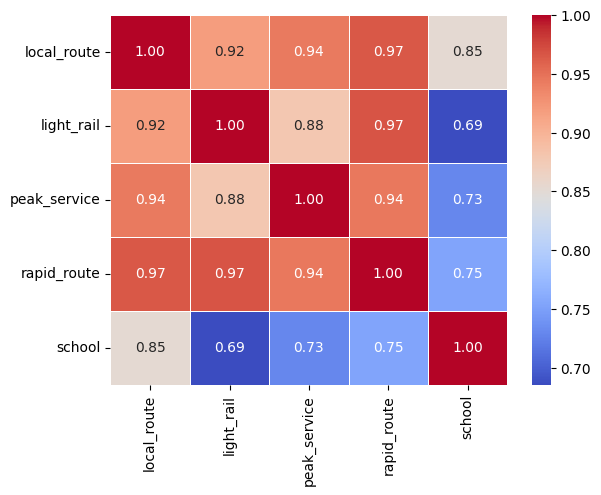

In [26]:
routes = ['local_route', 'light_rail', 'peak_service', 'rapid_route', 'school']

# Calculate correlation matrix
corr_matrix = dataset[routes].corr()

#generating heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

**From this heatmap, we can see that rapid route and light rail have a strong positive correlation**

### Insight no. 3

<Axes: xlabel='day', ylabel='peak_service'>

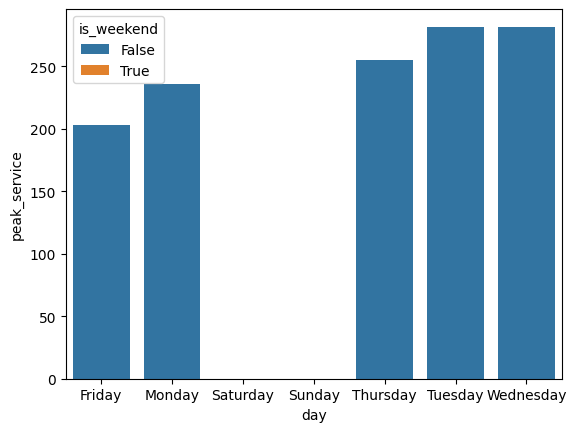

In [29]:
dataset['is_weekend'] = dataset['day'].isin(['Saturday', 'Sunday'])
avg_usage = dataset.groupby(['day', 'is_weekend'])['peak_service'].mean().reset_index()
sns.barplot(data=avg_usage, x='day', y='peak_service', hue='is_weekend')


**From this bar plot, we can see that the demand for peak service drops to zero on weekends, suggesting it might be a weekdays-exclusive.**

### Insight no. 4:

<Axes: xlabel='local_route'>

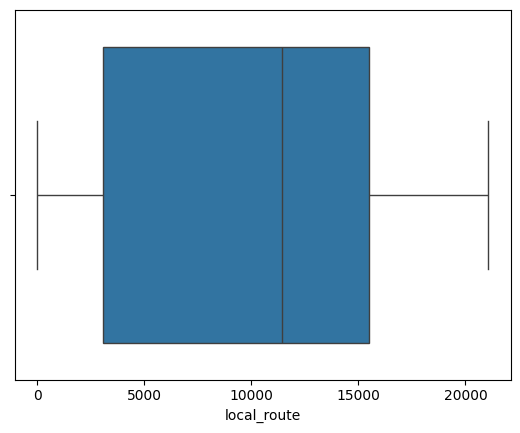

In [37]:
sns.boxplot(x='local_route',data=dataset)

**From this box plot, we can infer that among all the other routes, local route has the most stable demand among commuters, with most of the values falling in between the 25th and 75th percentile**